# legenda
file ss: strong static


file wsl:weak static aumento dei corpi proporzionale al numero di thread


file wss: weak static aumento dei corpi proporzionale alla radice quadrata del numero di thread

In [334]:
import matplotlib.pyplot as plt
import numpy as np

In [335]:
def read_file(input1, input2, input3):
  file = open(input1, "r")
  x_str = file.read()
  y1_str = x_str
  file.close()
  file = open(input2, "r")
  y2_str = file.read()
  file.close()
  file = open(input3, "r")
  y3_str = file.read()
  file.close()
  return x_str, y1_str, y2_str, y3_str

In [336]:
def filter_data(x_str, y1_str, y2_str, y3_str):
  x = x_str.split("\n")
  x = x[1:]
  x = filter(lambda x: x.find('#') == -1 and len(x)>1, x)
  x = map(lambda x : x[x.find(' '):], x)
  x = map(lambda x: int(x), x)
  x = list(x)

  y1 = y1_str.split("\n")
  y1 = filter(lambda x: x.find("simulation") != -1, y1)
  y1 = map(lambda x: x[x.find(":")+2:-1], y1)
  y1 = map(lambda x: float(x), y1)
  y1 = list(y1)

  y2 = y2_str.split("\n")
  y2 = filter(lambda x: x.find("simulation") != -1, y2)
  y2 = map(lambda x: x[x.find(":")+2:-1], y2)
  y2 = map(lambda x: float(x), y2)
  y2 = list(y2)

  y3 = y3_str.split("\n")
  y3 = filter(lambda x: x.find("simulation") != -1, y3)
  y3 = map(lambda x: x[x.find(":")+2:-1], y3)
  y3 = map(lambda x: float(x), y3)
  y3 = list(y3)
  return x, y1, y2, y3

In [337]:
def eval_y(y1, y2, y3):
  y_tot = []
  y_err = []
  for i in range(0, len(y1)):
      y_tot.append((y1[i] + y2[i] + y3[i])/3)
      y_max = max(y1[i], y2[i], y3[i])
      y_min = min(y1[i], y2[i], y3[i])
      y_err.append((y_max - y_min)/2)
      
  return y_tot, y_err

In [338]:
def plot_graph(x, y_tot, y_err, title = ""):
  x = np.array(x)
  y_tot = np.array(y_tot)
  y_err = np.array(y_err)
  s_up = np.array(list(map(lambda x: y_tot[0]/x, y_tot)))
  fig, axs = plt.subplots(2,2, figsize=(18, 10))
  fig.subplots_adjust(hspace=0.4)
  axs[0][0].errorbar(x, y_tot, yerr=y_err, fmt='o', color='black', ecolor='red', capsize=3, markersize=2)
  axs[0][0].set_ylabel("Time (s)")
  axs[0][0].set_xlabel("Number of threads")
  axs[0][0].set_title("Runtime")
  axs[0][0].grid()

  axs[0][1].errorbar(x, s_up, yerr=y_err, fmt='o', color='black', ecolor='red', capsize=3, markersize=2)
  axs[0][1].set_ylabel("T[0]/T[i]")
  axs[0][1].set_xlabel("Number of threads")
  axs[0][1].set_title("Speedup")
  axs[0][1].grid()

  axs[1][0].errorbar(x, s_up/x, yerr=y_err, fmt='o', color='black', ecolor='red', capsize=3, markersize=2)
  axs[1][0].set_ylabel("T[0]/(T[i]*i)")
  axs[1][0].set_xlabel("Number of threads")
  axs[1][0].set_title("Efficiency")
  axs[1][0].grid()

  axs[1][1].errorbar(x, y_tot*x, yerr=y_err, fmt='o', color='black', ecolor='red', capsize=3, markersize=2)
  axs[1][1].set_ylabel("T[i]*i")
  axs[1][1].set_xlabel("Number of threads")
  axs[1][1].set_title("Cost")
  axs[1][1].grid()
  fig.suptitle(title)
  plt.show()

In [339]:
def analyze_files(in1, in2, in3, title = ""):
  x_str, y1_str, y2_str, y3_str = read_file(in1, in2, in3)
  x, y1, y2, y3 = filter_data(x_str, y1_str, y2_str, y3_str)
  y_tot, y_err = eval_y(y1, y2, y3)
  plot_graph(x, y_tot, y_err, title)

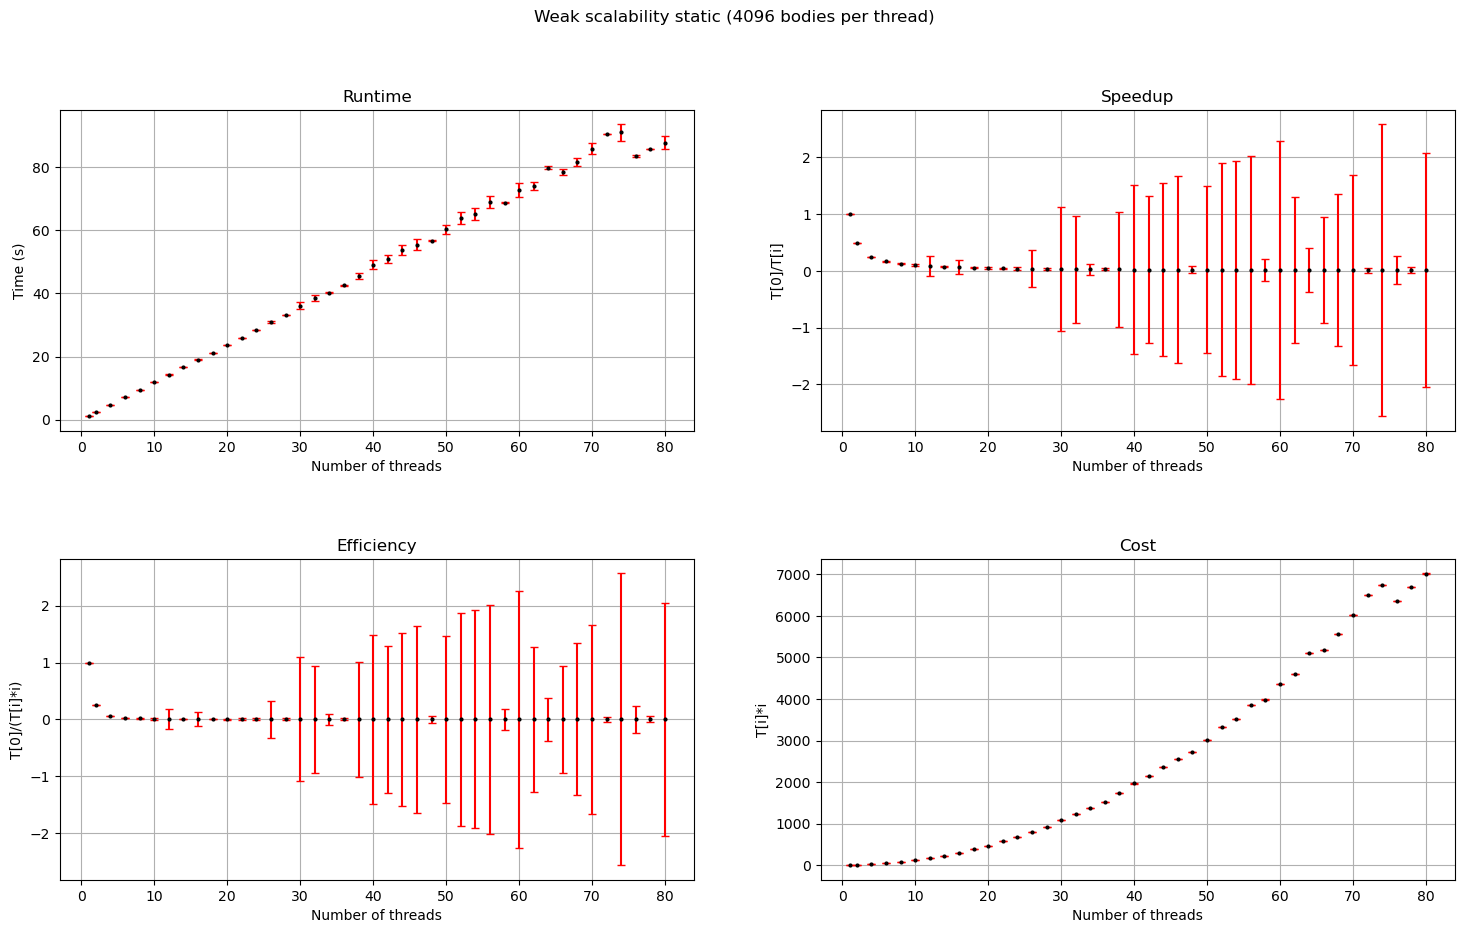

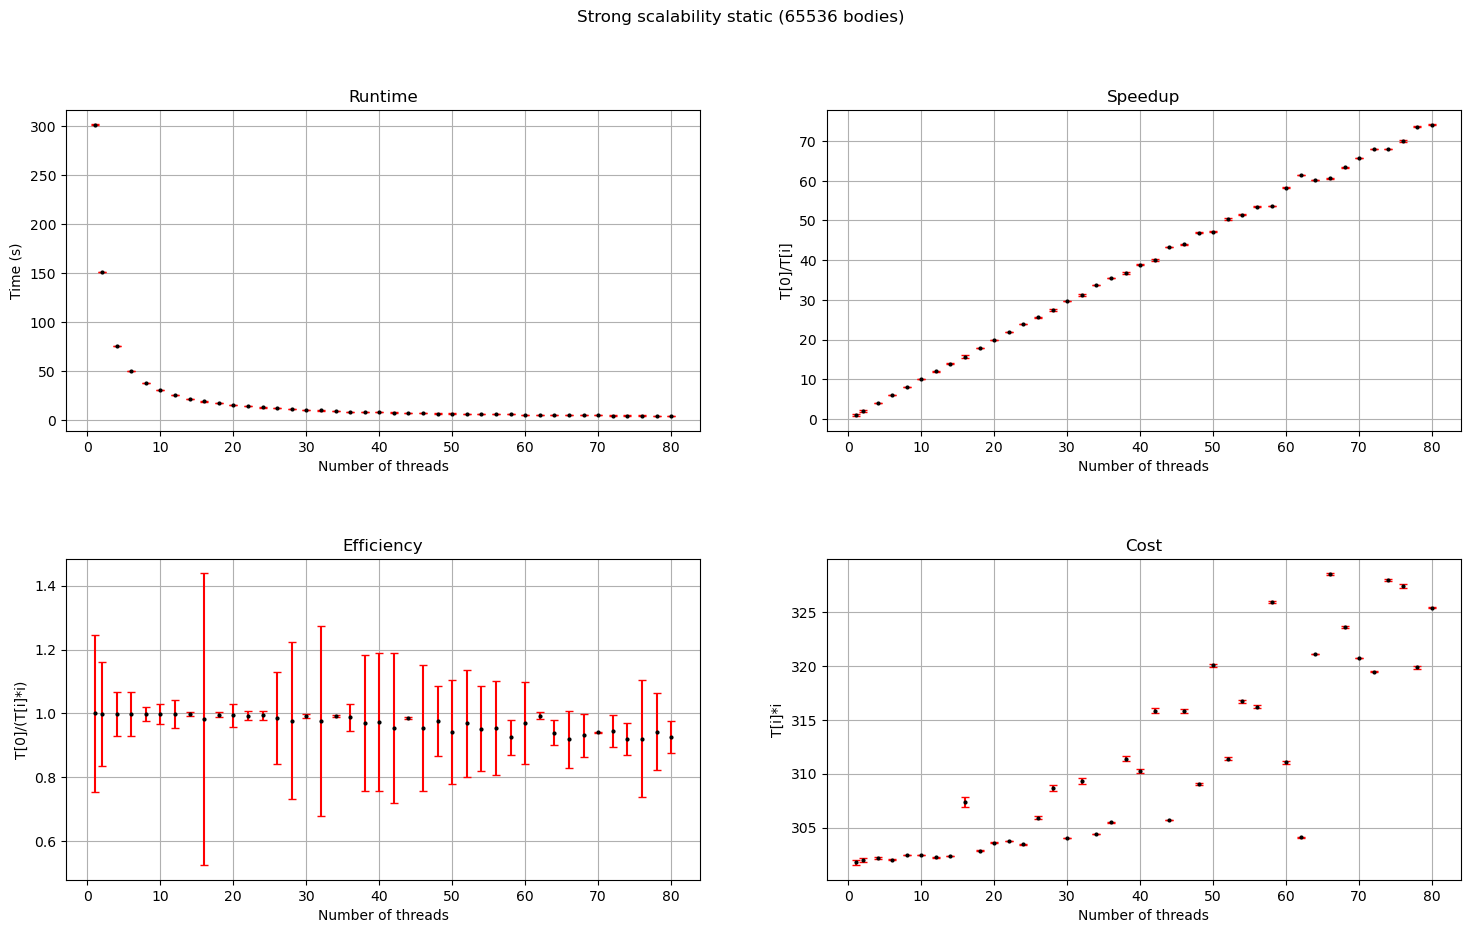

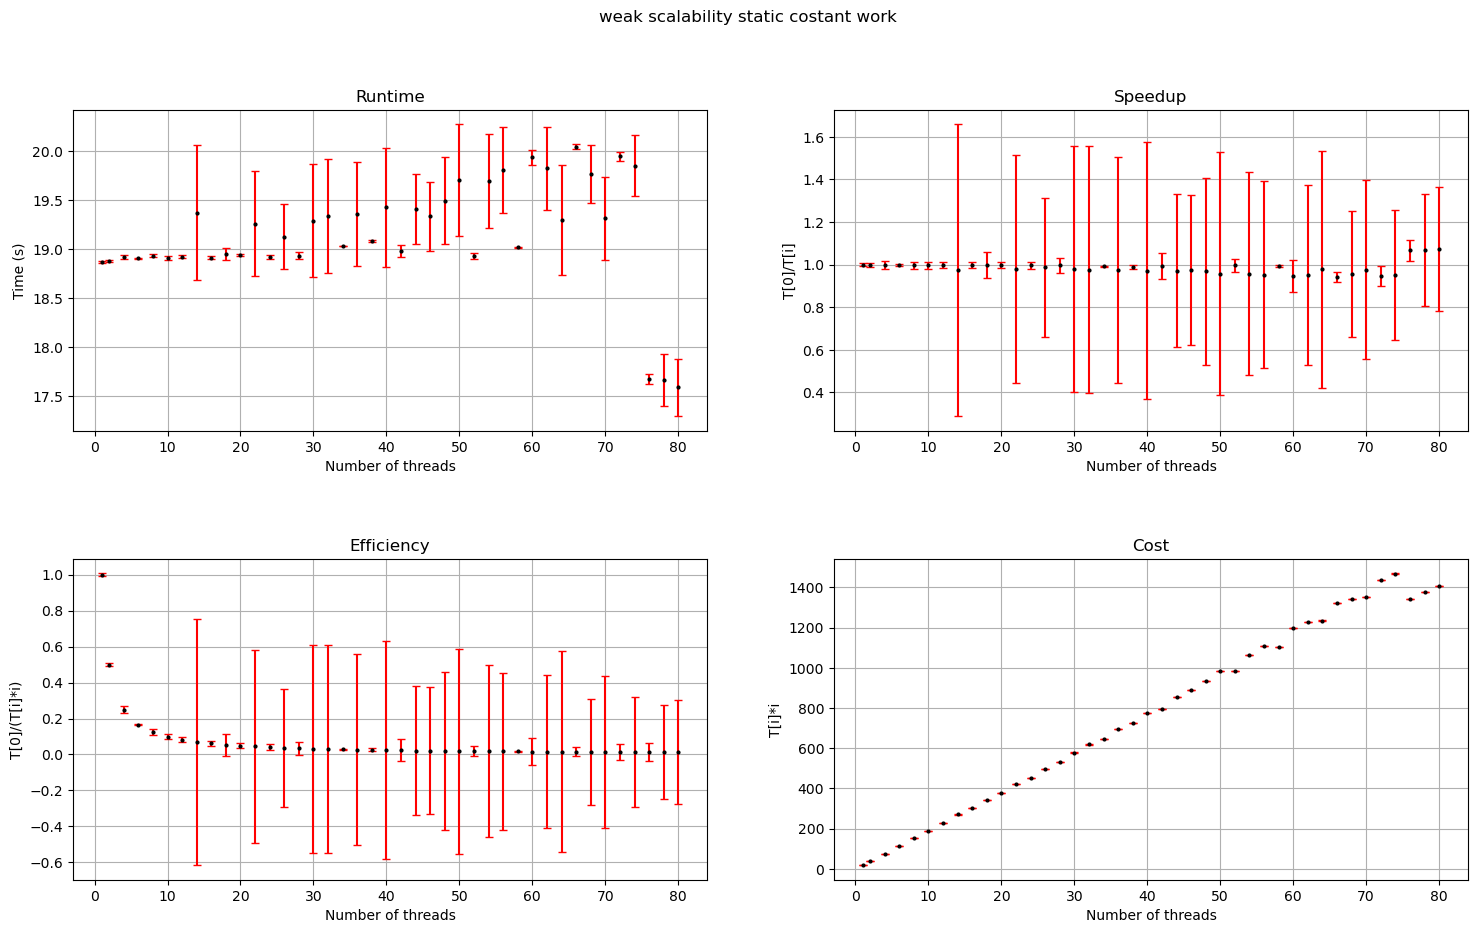

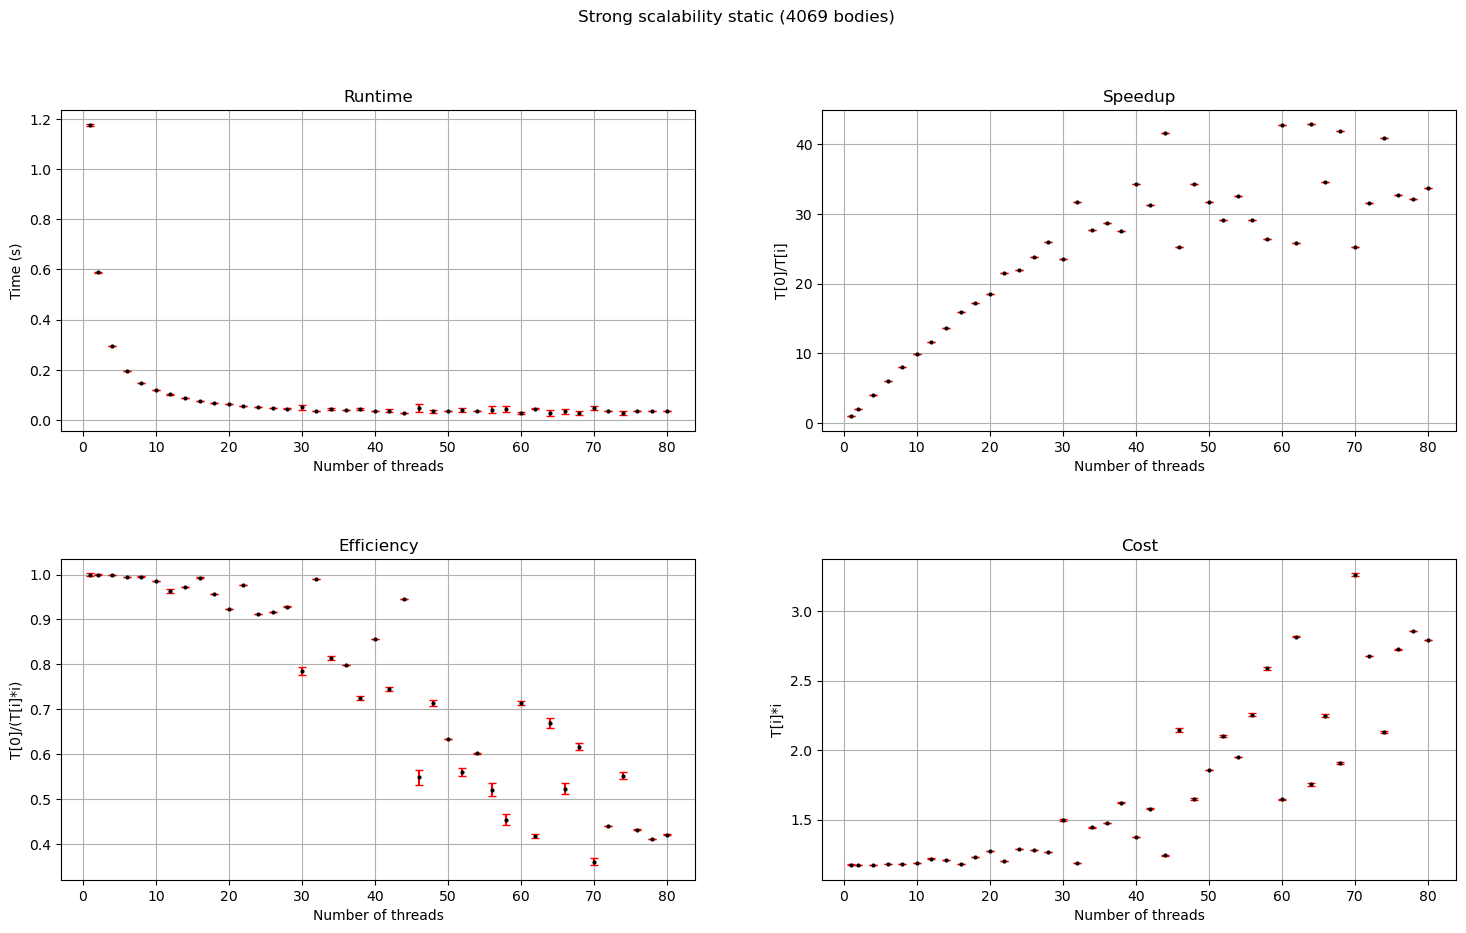

In [340]:
analyze_files("wsl1.log", "wsl2.log", "wsl3.log", "Weak scalability static (4096 bodies per thread)")
analyze_files("ss1.log", "ss2.log", "ss3.log", "Strong scalability static (65536 bodies)")
analyze_files("wss1.log", "wss2.log", "wss3.log", "weak scalability static costant work")
analyze_files("ss11.log", "ss12.log", "ss13.log", "Strong scalability static (4069 bodies)")